# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering


### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('marketing.csv')

# Display the first 5 rows
print(df.head())

# Check the shape
print("Shape of the dataset:", df.shape)

# Check the info
print("\nInfo of the dataset:")
print(df.info())



     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome   
0  5524        1957  Graduation         Single  58138.0        0         0  \
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases   
0    4/9/2012       58       635  ...                   10                  4  \
1    8/3/2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3   10/2/2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  Accepted

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [7]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('marketing.csv')

# Display the first 5 rows
print(df.head())

# Check the shape
print("\nShape of the dataset:", df.shape)

# Check the info
print("\nInfo of the dataset:")
print(df.info())

# Check the percentage of missing values
missing_percentage = df.isnull().mean() * 100

# Display the missing percentage
print("\nPercentage of missing values:")
print(missing_percentage)

# Treat missing values if present
# Convert "Income" column to numeric values, handling malformed strings
df["Income"] = pd.to_numeric(df["Income"], errors="coerce")

# Fill missing values with the median of the column
df["Income"].fillna(df["Income"].median(), inplace=True)


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome   
0  5524        1957  Graduation         Single  58138.0        0         0  \
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases   
0    4/9/2012       58       635  ...                   10                  4  \
1    8/3/2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3   10/2/2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  Accepted

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
# Check for duplicate records
duplicate_rows = df.duplicated()

# Count the number of duplicate records
num_duplicates = duplicate_rows.sum()

# Print the number of duplicate records
print("Number of duplicate records:", num_duplicates)

# Drop duplicate records
df.drop_duplicates(inplace=True)

# Reset the index after dropping duplicates
df.reset_index(drop=True, inplace=True)

# Verify the dataset after dropping duplicates
print("\nShape of the dataset after dropping duplicates:", df.shape)


Number of duplicate records: 0

Shape of the dataset after dropping duplicates: (2240, 27)


### 5. Drop the columns which you think redundant for the analysis 

In [16]:
import pandas as pd

# Read the dataset into a DataFrame
df = pd.read_csv('marketing.csv')

# List of columns to drop
columns_to_drop = ['ID', 'Dt_Customer']

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Print the updated DataFrame
print(df)


      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome   
0           1957  Graduation         Single  58138.0        0         0  \
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases   
0          58     

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [17]:
import pandas as pd

# Assuming you have loaded your dataset into the 'df' DataFrame

# Check unique categories in 'Marital_Status'
unique_categories = df['Marital_Status'].unique()
print(unique_categories)

# Group categories 'Married' and 'Together' as 'relationship'
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'relationship')

# Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

# Print the updated DataFrame
print(df['Marital_Status'])


['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
0             Single
1             Single
2       relationship
3       relationship
4       relationship
            ...     
2235    relationship
2236    relationship
2237          Single
2238    relationship
2239    relationship
Name: Marital_Status, Length: 2240, dtype: object


### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [18]:
import pandas as pd

# Assuming you have loaded your dataset into the 'df' DataFrame

# Create a new column 'Total_Expenses' by summing the individual expense columns
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Print the updated DataFrame
print(df['Total_Expenses'])


0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2240, dtype: int64


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [19]:
import pandas as pd

# Assuming you have loaded your dataset into the 'df' DataFrame

# Create a new column 'Num_Total_Purchases' by summing the individual purchase columns
df['Num_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Print the updated DataFrame
print(df['Num_Total_Purchases'])


0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2240, dtype: int64


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [20]:
import pandas as pd

# Assuming you have loaded your dataset into the 'df' DataFrame

# Create a new column 'Kids' by summing the values of 'Kidhome' and 'Teenhome'
df['Kids'] = df['Kidhome'] + df['Teenhome']

# Print the updated DataFrame
print(df['Kids'])


0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2240, dtype: int64


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [21]:
import pandas as pd

# Assuming you have loaded your dataset into the 'df' DataFrame

# Create a new column 'TotalAcceptedCmp' by summing the values of 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', and 'Response'
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

# Print the updated DataFrame
print(df['TotalAcceptedCmp'])


0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64


### 11. Drop those columns which we have used above for obtaining new features

In [24]:
import pandas as pd

# Assuming you have loaded your dataset into the 'df' DataFrame

# List of columns to drop
columns_to_drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Kidhome', 'Teenhome', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Drop the columns from the DataFrame if they exist
df = df.drop(columns=columns_to_drop, errors='ignore')

# Print the updated DataFrame
print(df)


      Year_Birth   Education Marital_Status   Income  Recency   
0           1957  Graduation         Single  58138.0       58  \
1           1954  Graduation         Single  46344.0       38   
2           1965  Graduation   relationship  71613.0       26   
3           1984  Graduation   relationship  26646.0       26   
4           1981         PhD   relationship  58293.0       94   
...          ...         ...            ...      ...      ...   
2235        1967  Graduation   relationship  61223.0       46   
2236        1946         PhD   relationship  64014.0       56   
2237        1981  Graduation         Single  56981.0       91   
2238        1956      Master   relationship  69245.0        8   
2239        1954         PhD   relationship  52869.0       40   

      NumWebVisitsMonth  Complain  Total_Expenses  Num_Total_Purchases  Kids   
0                     7         0            1617                   25     0  \
1                     5         0              27          

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [25]:
# Extracting 'age' from 'Year_Birth'
df['age'] = pd.to_datetime('today').year - df['Year_Birth']

# Dropping the 'Year_Birth' column
df = df.drop(columns=['Year_Birth'])

# Print the updated DataFrame
print(df)


       Education Marital_Status   Income  Recency  NumWebVisitsMonth   
0     Graduation         Single  58138.0       58                  7  \
1     Graduation         Single  46344.0       38                  5   
2     Graduation   relationship  71613.0       26                  4   
3     Graduation   relationship  26646.0       26                  6   
4            PhD   relationship  58293.0       94                  5   
...          ...            ...      ...      ...                ...   
2235  Graduation   relationship  61223.0       46                  5   
2236         PhD   relationship  64014.0       56                  7   
2237  Graduation         Single  56981.0       91                  6   
2238      Master   relationship  69245.0        8                  3   
2239         PhD   relationship  52869.0       40                  7   

      Complain  Total_Expenses  Num_Total_Purchases  Kids  TotalAcceptedCmp   
0            0            1617                   25     

### 13. Encode the categorical variables in the dataset

In [26]:
# Assuming you have loaded your dataset into the 'df' DataFrame

# Select categorical columns for encoding
categorical_columns = ['Marital_Status', 'Education']

# Perform one-hot encoding using get_dummies()
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Print the updated DataFrame with encoded categorical variables
print(df_encoded)


       Income  Recency  NumWebVisitsMonth  Complain  Total_Expenses   
0     58138.0       58                  7         0            1617  \
1     46344.0       38                  5         0              27   
2     71613.0       26                  4         0             776   
3     26646.0       26                  6         0              53   
4     58293.0       94                  5         0             422   
...       ...      ...                ...       ...             ...   
2235  61223.0       46                  5         0            1341   
2236  64014.0       56                  7         0             444   
2237  56981.0       91                  6         0            1241   
2238  69245.0        8                  3         0             843   
2239  52869.0       40                  7         0             172   

      Num_Total_Purchases  Kids  TotalAcceptedCmp  age  Marital_Status_Single   
0                      25     0                 1   66            

### 14. Standardize the columns, so that values are in a particular range

In [29]:
# Print the column names
print(df.columns)


Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth',
       'Complain', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
       'TotalAcceptedCmp', 'age'],
      dtype='object')


In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Select the numeric columns to be standardized
numeric_columns = ['Income', 'Recency', 'NumWebVisitsMonth', 'Total_Expenses',
                   'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp', 'age']

# Select the categorical columns to be encoded
categorical_columns = ['Education', 'Marital_Status', 'Complain']

# Preprocess numeric columns
numeric_data = df[numeric_columns].values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
df[numeric_columns] = scaled_data

# Preprocess categorical columns
label_encoders = {}
for column in categorical_columns:
    encoder = LabelEncoder()
    encoded_values = encoder.fit_transform(df[column])
    df[column] = encoded_values
    label_encoders[column] = encoder

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int64  
 1   Marital_Status       2240 non-null   int64  
 2   Income               2216 non-null   float64
 3   Recency              2240 non-null   float64
 4   NumWebVisitsMonth    2240 non-null   float64
 5   Complain             2240 non-null   int64  
 6   Total_Expenses       2240 non-null   float64
 7   Num_Total_Purchases  2240 non-null   float64
 8   Kids                 2240 non-null   float64
 9   TotalAcceptedCmp     2240 non-null   float64
 10  age                  2240 non-null   float64
 11  Cluster_x            2240 non-null   int32  
 12  Cluster_y            2216 non-null   float64
 13  Cluster              0 non-null      object 
 14  Cluster              2216 non-null   float64
dtypes: float64(10), int32(1), int64(3), ob

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [32]:
# Check data types of all columns
print(df.dtypes)


Education               object
Marital_Status          object
Income                 float64
Recency                  int64
NumWebVisitsMonth        int64
Complain                 int64
Total_Expenses           int64
Num_Total_Purchases      int64
Kids                     int64
TotalAcceptedCmp         int64
age                      int64
dtype: object


Number of components explaining 90% of variance: 11
Explained variance ratio for 11 components: 0.9642902287798936
Component 1:
Feature Education: -0.0
Feature Marital_Status: -0.022186909273916644
Feature Income: 0.39234407177962866
Feature Recency: -0.014377117368679665
Feature NumWebVisitsMonth: -0.3537286954519581
Feature Complain: -0.02798335752977802
Feature Total_Expenses: 0.4789042026055176
Feature Num_Total_Purchases: 0.34096930337549924
Feature Kids: -0.3553190991132763
Feature TotalAcceptedCmp: 0.30391515879966136
Feature age: 0.016887615647830062
Feature Cluster_x: 0.27369214408390896
Feature Cluster_y: 0.28151276267634273
Feature Cluster: 0.0

Component 2:
Feature Education: -0.0
Feature Marital_Status: 0.05130451859415541
Feature Income: 0.270849077275944
Feature Recency: 0.08227285409593368
Feature NumWebVisitsMonth: -0.12472844354295524
Feature Complain: 0.020432605464868255
Feature Total_Expenses: 0.16368410176880166
Feature Num_Total_Purchases: 0.3923649140313284
Feat

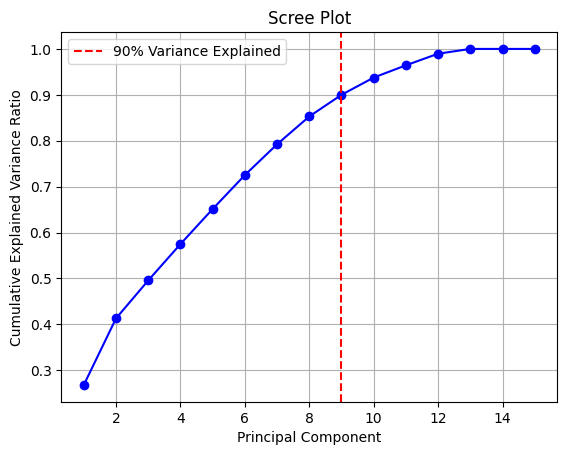

In [143]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Assuming you have loaded your dataset into the 'df' DataFrame

# Select numeric columns for standardization
numeric_columns = df.select_dtypes(include=np.number).columns

# Standardize the numeric columns in the dataset
std_dev = df[numeric_columns].std()
std_dev_nonzero = std_dev.replace(0, 0.0001)
standardized_data = (df[numeric_columns] - df[numeric_columns].mean()) / std_dev_nonzero

# Fill missing values with 0 after standardization
standardized_data = standardized_data.fillna(0)

# Initialize PCA
pca = PCA()

# Apply PCA on the standardized data
pca.fit(standardized_data)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Print the number of components
print("Number of components explaining 90% of variance:", n_components)

# Calculate the explained variance ratio for the selected number of components
explained_variance_ratio = cumulative_variance_ratio[n_components - 1]

# Print the explained variance ratio
print("Explained variance ratio for", n_components, "components:", explained_variance_ratio)

# Get the PCA components
components = pca.components_

# List the components and their feature weights
for i, component in enumerate(components[:n_components]):
    print(f"Component {i+1}:")
    for j, weight in enumerate(numeric_columns):
        print(f"Feature {weight}: {component[j]}")
    print()

# Calculate cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components explaining 90% of variance
n_components_90 = np.where(cumulative_variance_ratio >= 0.9)[0][0] + 1

# Generate scree plot
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance_ratio, 'bo-')
plt.axvline(x=n_components_90, color='r', linestyle='--', label='90% Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)

# Add legend
plt.legend()

plt.show()






### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [38]:
column_names = df.columns.tolist()
print(column_names)


['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Total_Expenses', 'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp', 'age', 'Cluster']


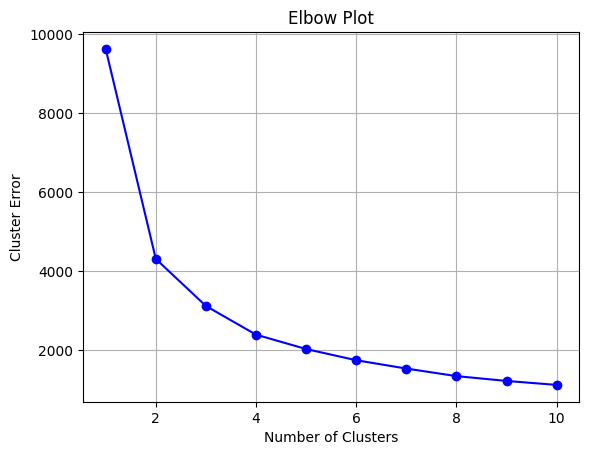

Cluster Assignments:
   Cluster  Cluster  Cluster  Cluster  Cluster  Cluster  Cluster  Cluster   
0     None      4.0      0.0      0.0      0.0      0.0      0.0      0.0  \
1     None      1.0      2.0      2.0      2.0      2.0      4.0      4.0   
2     None      0.0      4.0      4.0      4.0      4.0      0.0      0.0   
3     None      3.0      1.0      1.0      1.0      1.0      3.0      3.0   
4     None      0.0      4.0      4.0      4.0      4.0      3.0      3.0   

   Cluster  Cluster  ...  Marital_Status    Income   Recency   
0      0.0      0.0  ...               0  0.234063  0.307039  \
1      4.0      4.0  ...               0 -0.234559 -0.383664   
2      0.0      0.0  ...               1  0.769478 -0.798086   
3      3.0      3.0  ...               1 -1.017239 -0.798086   
4      3.0      3.0  ...               1  0.240221  1.550305   

   NumWebVisitsMonth  Complain  Total_Expenses  Num_Total_Purchases      Kids   
0           0.693904         0        1.679417    

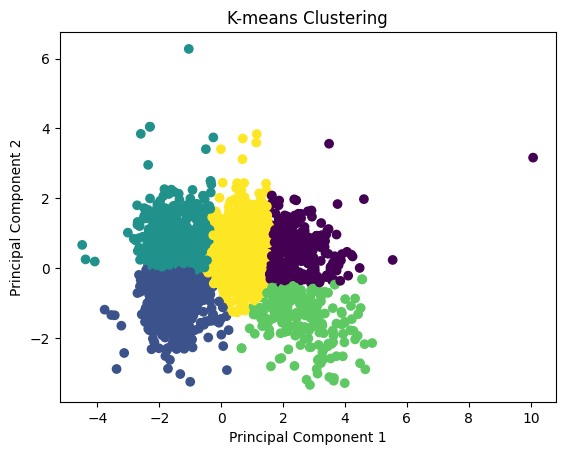

In [156]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into the 'df' DataFrame

# Select the columns for clustering
columns_for_clustering = ['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth', 'Complain',
                          'Total_Expenses', 'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp', 'age']

# Create a new DataFrame with the selected columns
data_for_clustering = df[columns_for_clustering].copy()

# Handle missing values
data_for_clustering = data_for_clustering.dropna()

# Perform label encoding on categorical columns
label_encoder = LabelEncoder()
for column in data_for_clustering.select_dtypes(include='object'):
    data_for_clustering[column] = label_encoder.fit_transform(data_for_clustering[column])

# Standardize the data
scaler = StandardScaler()
data_for_clustering = scaler.fit_transform(data_for_clustering)

# Apply PCA on the data for dimensionality reduction
pca = PCA(n_components=2)
pca_transformed_data = pca.fit_transform(data_for_clustering)

# Determine the optimal number of clusters using elbow plot
cluster_errors = []
max_clusters = 10
for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
    kmeans.fit(pca_transformed_data)
    cluster_errors.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, max_clusters + 1), cluster_errors, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Error')
plt.title('Elbow Plot')
plt.grid(True)
plt.show()

# Apply K-means clustering with the optimal number of clusters
optimal_num_clusters = 5
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0, n_init=10)
cluster_labels = kmeans.fit_predict(pca_transformed_data)

# Set the number of decimals for numpy print options
np.set_printoptions(precision=4)

# Create a DataFrame to hold the cluster labels
cluster_df = pd.DataFrame(cluster_labels, columns=['Cluster'])

# Concatenate the cluster labels DataFrame with the original DataFrame
df = pd.concat([df, cluster_df], axis=1)

# Print the cluster assignments
print("Cluster Assignments:")
print(df[['Cluster'] + columns_for_clustering].head())  # Print the head of the DataFrame

# Visualize the clusters
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.show()


### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

In [166]:
import pandas as pd

# Load the data
df = pd.read_csv('marketing.csv')

# Print the column names
print(df.columns)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


In [184]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the data
df = pd.read_csv('marketing.csv')

# Drop 'ID' and 'Dt_Customer' columns
df = df.drop(columns=['ID', 'Dt_Customer'])

# Convert 'Year_Birth' to 'Age'
df['Age'] = 2023 - df['Year_Birth']

# Now drop the 'Year_Birth' column as it's no longer needed
df = df.drop(columns=['Year_Birth'])

# Define which columns should be encoded vs scaled
columns_to_encode = ['Education', 'Marital_Status']
columns_to_scale = [col for col in df.columns if col not in columns_to_encode]

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe = OneHotEncoder(drop='first')
num_imputer = SimpleImputer(strategy='mean')  # Using mean strategy for imputation
cat_imputer = SimpleImputer(strategy='most_frequent')  # Using most_frequent strategy for imputation

# Combine the encoder/scaler to preprocess data
preprocess = ColumnTransformer(
    transformers=[
        ('impute_encode', make_pipeline(cat_imputer, ohe), columns_to_encode),
        ('impute_scale', make_pipeline(num_imputer, scaler), columns_to_scale)])

df_std = preprocess.fit_transform(df)

# Applying Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(df_std)

# Adding cluster labels to the dataframe
df['cluster_labels'] = clusters

# Listing features and cluster labels
print("Features: ", df.columns[:-1])  # Excluding 'cluster_labels'
print("Cluster Labels: ", np.unique(clusters))

# For numerical columns, calculate the mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
numeric_cluster_analysis = df[numerical_cols].groupby('cluster_labels').mean()

# For categorical columns, calculate the mode (most frequent category)
categorical_cols = df.select_dtypes(include=[object]).columns
categorical_cols_with_labels = list(categorical_cols) + ['cluster_labels']
categorical_cluster_analysis = df[categorical_cols_with_labels].groupby('cluster_labels').agg(lambda x: x.mode().iloc[0])

# Combine both dataframes for the final cluster analysis
cluster_analysis = pd.concat([numeric_cluster_analysis, categorical_cluster_analysis], axis=1)

# Printing the cluster analysis
cluster_analysis


Features:  Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')
Cluster Labels:  [0 1 2]


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Education,Marital_Status
cluster_labels,,,,,,,,,,,,,,,,,,,,,
0,75886.800000,0.042017,0.213445,49.346218,597.805042,65.556303,434.001681,93.966387,66.364706,76.166387,...,0.052101,0.152941,0.263866,0.240336,0.05042,0.000000,0.285714,54.904202,Graduation,Married
1,34783.228571,0.795193,0.453501,50.308255,47.125392,5.776385,26.615465,7.737722,5.459770,15.180773,...,0.003135,0.000000,0.001045,0.000000,0.00000,0.021944,0.072100,51.723093,Graduation,Married
2,56000.801762,0.303779,0.832849,47.236919,407.010174,20.905523,131.200581,30.148256,23.123547,56.340116,...,0.187500,0.110465,0.007267,0.001453,0.00000,0.000000,0.138081,57.017442,Graduation,Married


In [ ]:
analysis = 
"hello world"
print(analysis)


### Visualization and Interpretation of results

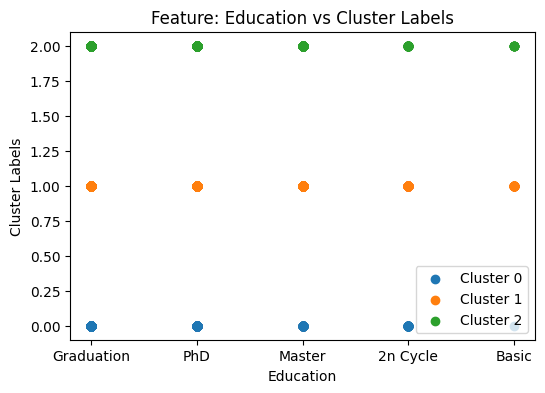

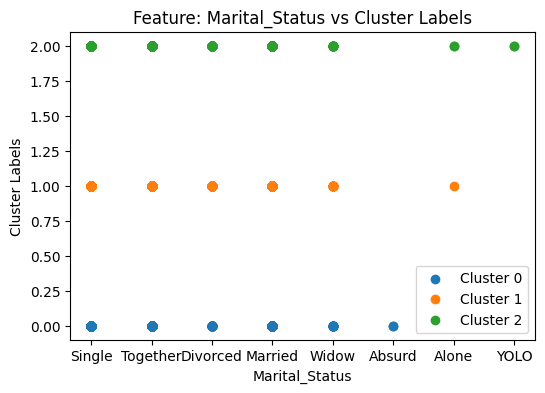

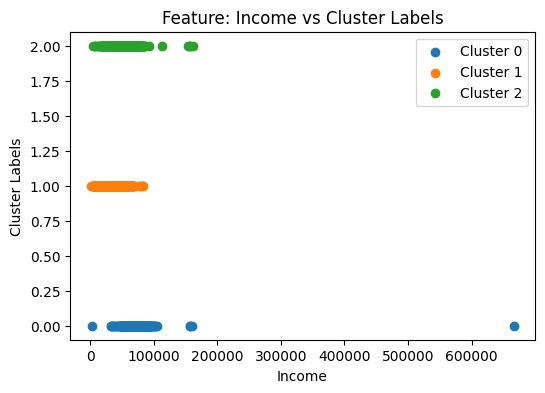

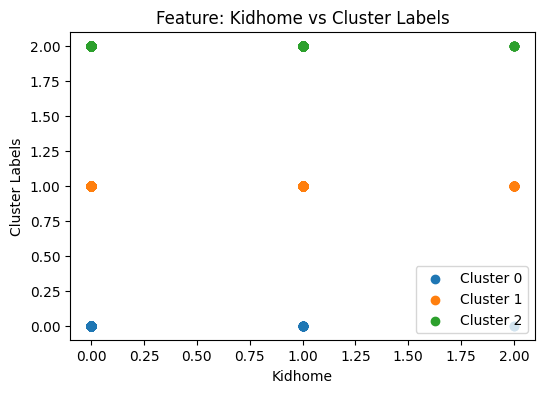

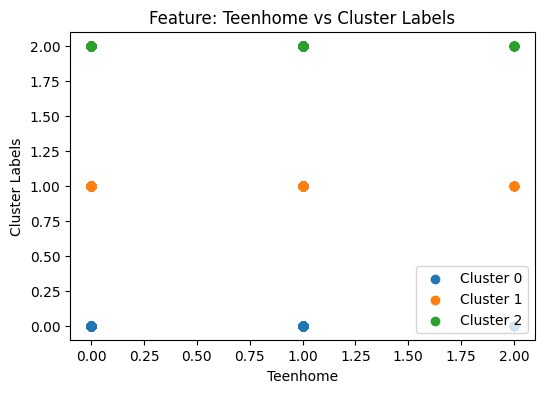

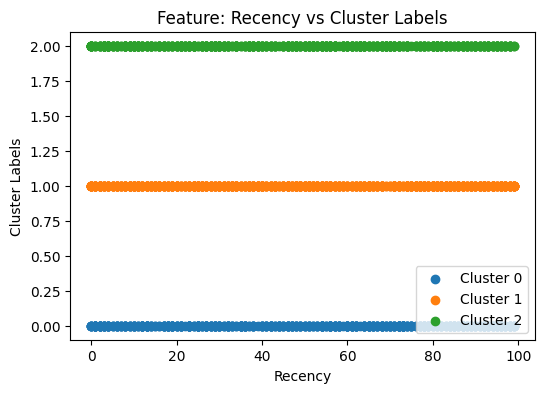

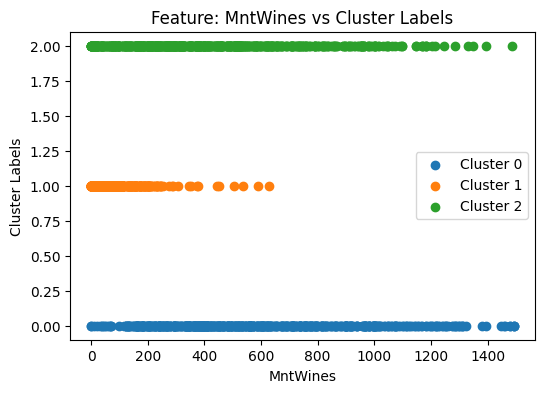

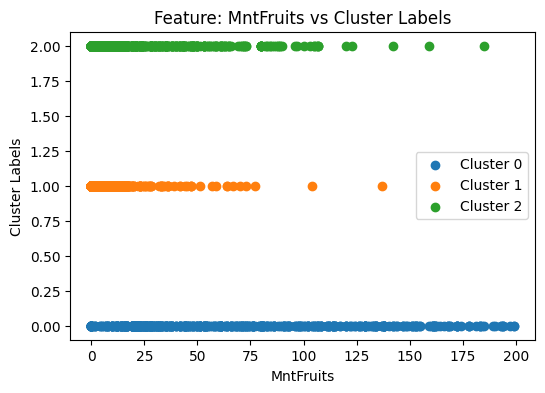

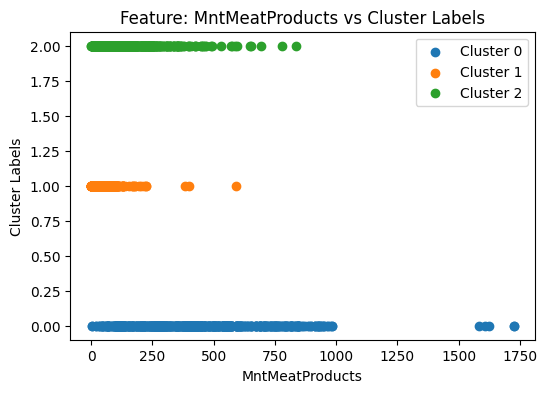

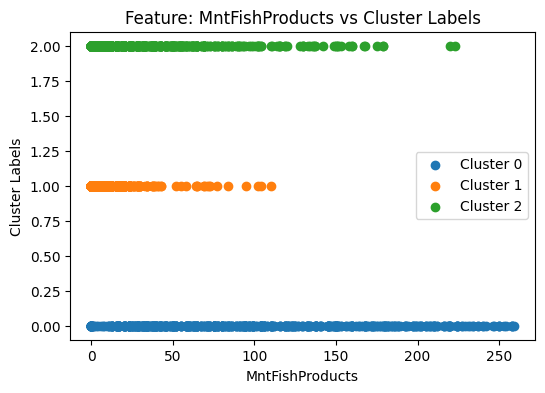

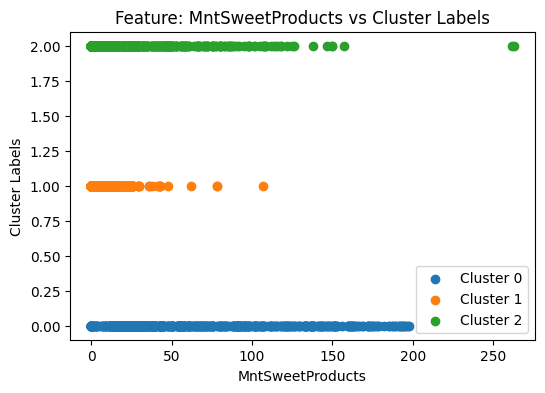

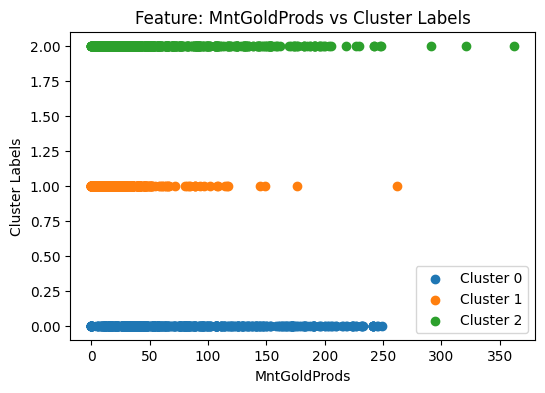

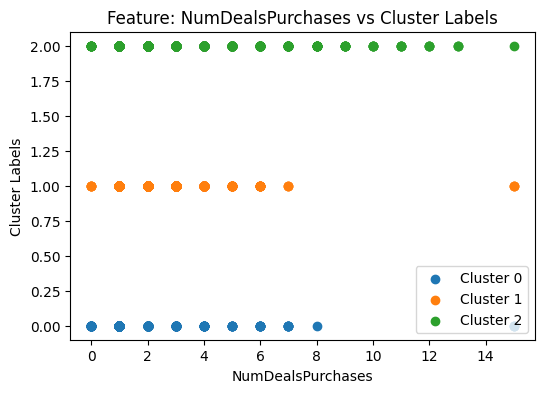

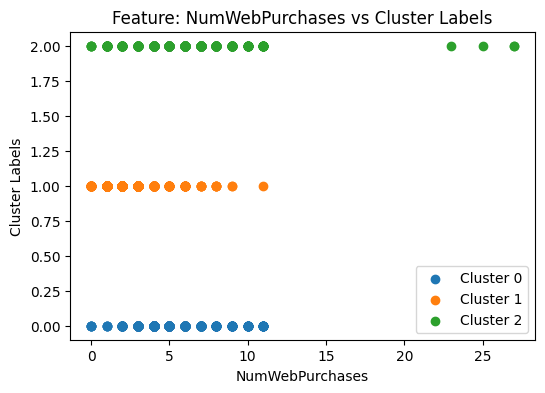

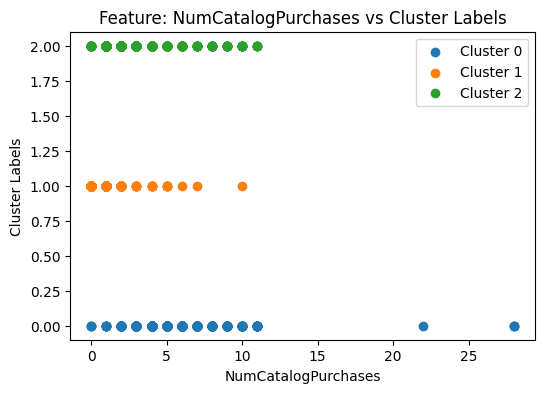

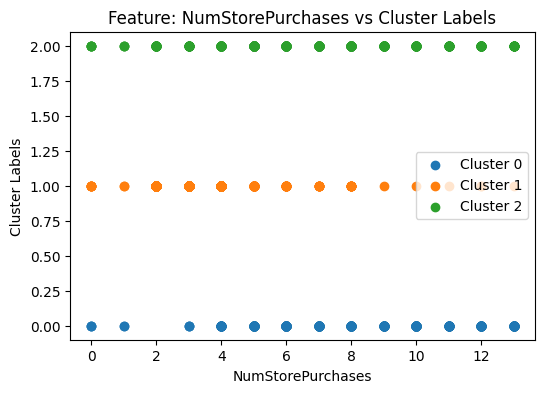

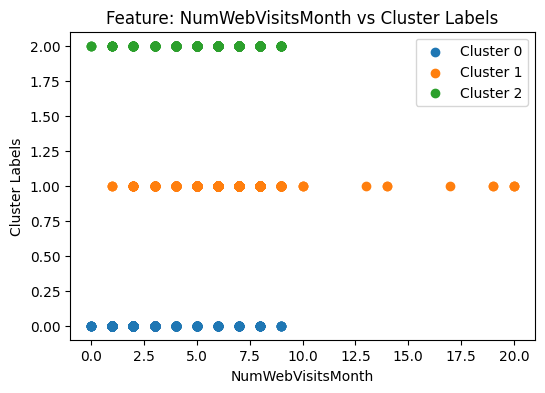

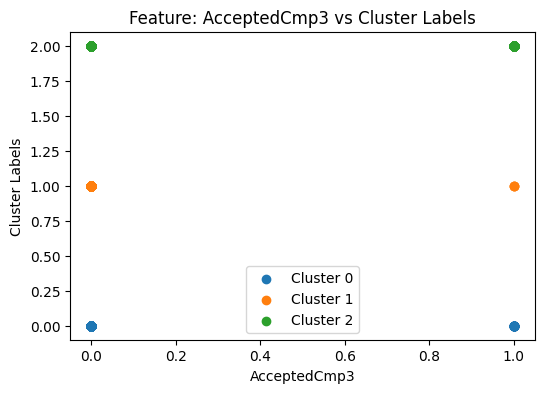

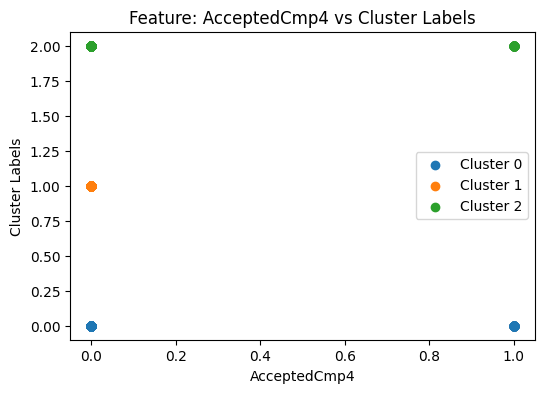

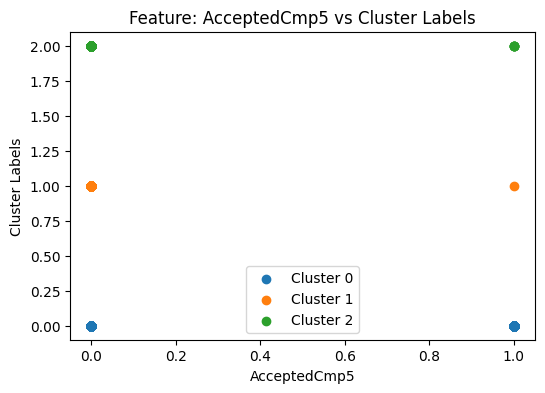

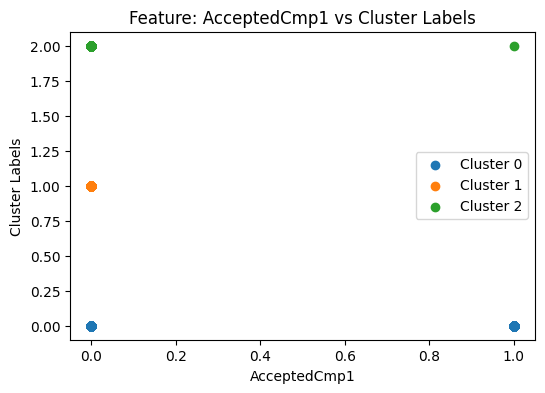

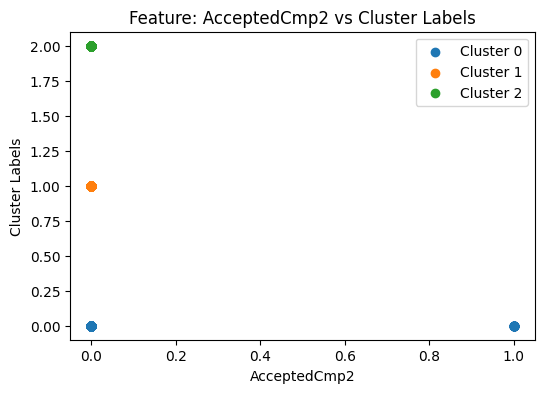

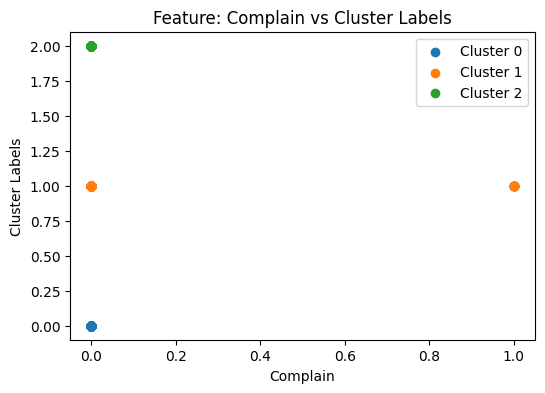

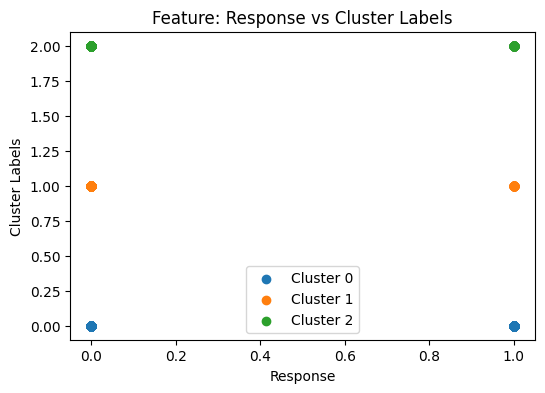

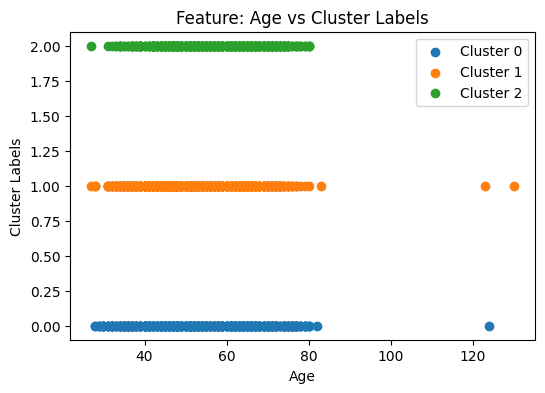

In [185]:
import matplotlib.pyplot as plt

# Bivariate analysis between the cluster label and different features
for i in range(df.shape[1] - 1):  # Now, '-1' is used because there's one less column
    plt.figure(figsize=(6, 4))
    plt.title(f"Feature: {df.columns[i]} vs Cluster Labels")
    for cluster in np.unique(clusters):
        plt.scatter(df[df['cluster_labels'] == cluster].iloc[:, i], df[df['cluster_labels'] == cluster]['cluster_labels'], label=f"Cluster {cluster}")
    plt.xlabel(df.columns[i])
    plt.ylabel('Cluster Labels')
    plt.legend()
    plt.show()


-----
## Happy Learning
-----